<a href="https://colab.research.google.com/github/rachocr/CCADMACL_PROJECT_COM222/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import sys

In [ ]:
data = pd.read_csv('steam.csv')

In [ ]:
data = data.dropna()

In [ ]:
data.head(5)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


# Kmeans


In [ ]:
genres_encoded = data['genres'].str.get_dummies(sep=';')
owner_encoded = data['owners'].str.get_dummies()

In [ ]:
features = ['positive_ratings', 'negative_ratings']
data_encoded = pd.concat([data[features], genres_encoded, data['name']], axis=1)



In [ ]:
data_encoded

,positive_ratings,negative_ratings,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,...,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing,name
0,124534,3339,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Counter-Strike
1,3318,633,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Team Fortress Classic
2,3416,398,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Day of Defeat
3,1273,267,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deathmatch Classic
4,5250,288,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Half-Life: Opposing Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Room of Pandora
27071,8,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cyber Gun
27072,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Super Star Blast
27073,2,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,New Yankee 7: Deer Hunters


In [ ]:
columns_to_check = ['Accounting','Animation & Modeling', 'Audio Production', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Game Development', 'Photo Editing'
, 'Software Training', 'Tutorial', 'Utilities', 'Video Production', 'Web Publishing']

# Loop through the columns and drop rows where the value is 1
for column in columns_to_check:
    data_encoded = data_encoded[data_encoded[column] != 1]

data_encoded = data_encoded.drop(columns_to_check , axis=1)


In [ ]:
data_encoded

,positive_ratings,negative_ratings,Action,Adventure,Casual,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent,name
0,124534,3339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Counter-Strike
1,3318,633,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Team Fortress Classic
2,3416,398,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Day of Defeat
3,1273,267,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deathmatch Classic
4,5250,288,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Half-Life: Opposing Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,Room of Pandora
27071,8,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Cyber Gun
27072,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Super Star Blast
27073,2,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,New Yankee 7: Deer Hunters


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded.drop(['name'], axis=1))

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [ ]:
data_encoded['Cluster'] = kmeans.labels_

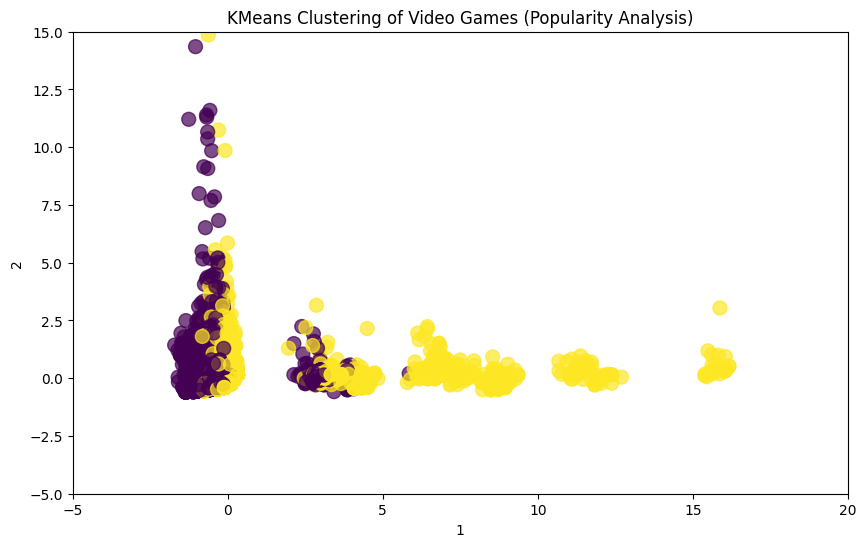

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data_encoded['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering of Video Games (Popularity Analysis)')
plt.xlim(-5, 20)
plt.ylim(-5, 15)
plt.xlabel('1')
plt.ylabel('2')
plt.show()

In [ ]:
cluster = 0
specific_cluster_games = data_encoded[data_encoded['Cluster'] == cluster]


print(f"Games in cluster {cluster}:\n", specific_cluster_games[['name']].head(30))

Games in cluster 0:
                                 name
0                     Counter-Strike
1              Team Fortress Classic
2                      Day of Defeat
3                 Deathmatch Classic
4          Half-Life: Opposing Force
5                           Ricochet
6                          Half-Life
7     Counter-Strike: Condition Zero
8              Half-Life: Blue Shift
9                        Half-Life 2
10            Counter-Strike: Source
11                 Half-Life: Source
12             Day of Defeat: Source
13           Half-Life 2: Deathmatch
14           Half-Life 2: Lost Coast
15      Half-Life Deathmatch: Source
16          Half-Life 2: Episode One
17                            Portal
18          Half-Life 2: Episode Two
19                   Team Fortress 2
20                       Left 4 Dead
21                     Left 4 Dead 2
22                            Dota 2
24                       Alien Swarm
25  Counter-Strike: Global Offensive
26               

In [ ]:
cluster_means = data_encoded.groupby('Cluster')[features].mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
          positive_ratings  negative_ratings
Cluster                                    
0             1187.830639        214.597504
1              908.176991        236.916361


In [ ]:
cluster_sizes = data_encoded['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 Cluster
0    14661
1     9266
Name: count, dtype: int64


In [ ]:
genres = ['Action', 'Adventure', 'Casual',
       'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer', 'Nudity',
       'RPG', 'Racing', 'Sexual Content', 'Simulation', 'Sports', 'Strategy',
       'Violent']




cluster_data_0 = data_encoded[data_encoded['Cluster'] == 0]
cluster_data_1 = data_encoded[data_encoded['Cluster'] == 1]


genre_counts_in_cluster_0 = cluster_data_0[genres].sum()
genre_counts_in_cluster_1 = cluster_data_1[genres].sum()


print(f"Genre counts in Cluster")
for genre in genres:
    print(f"{genre}: {genre_counts_in_cluster_0[genre]}/{genre_counts_in_cluster_1[genre]}")

Genre counts in Cluster
Action: 6231/3952
Adventure: 85/8930
Casual: 6030/3328
Free to Play: 1020/435
Gore: 10/439
Indie: 10075/6931
Massively Multiplayer: 345/162
Nudity: 9/237
RPG: 1619/2024
Racing: 766/106
Sexual Content: 9/227
Simulation: 3178/1139
Sports: 1027/71
Strategy: 3527/1004
Violent: 152/549


# DBSCAN


In [ ]:
genres_encoded = data['genres'].str.get_dummies(sep=';')
owner_encoded = data['owners'].str.get_dummies()
features = ['positive_ratings', 'negative_ratings']
data_DBSCAN = pd.concat([data[features], genres_encoded, data['name']], axis=1)


In [ ]:
columns_to_check = ['Accounting','Animation & Modeling', 'Audio Production', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Game Development', 'Photo Editing'
, 'Software Training', 'Tutorial', 'Utilities', 'Video Production', 'Web Publishing']

# Loop through the columns and drop rows where the value is 1
for column in columns_to_check:
    data_DBSCAN = data_DBSCAN[data_DBSCAN[column] != 1]

data_DBSCAN = data_DBSCAN.drop(columns_to_check , axis=1)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_DBSCAN.drop(['name'], axis=1))

In [ ]:
data_DBSCAN

,positive_ratings,negative_ratings,Action,Adventure,Casual,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent,name
0,124534,3339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Counter-Strike
1,3318,633,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Team Fortress Classic
2,3416,398,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Day of Defeat
3,1273,267,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deathmatch Classic
4,5250,288,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Half-Life: Opposing Force
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,Room of Pandora
27071,8,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Cyber Gun
27072,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Super Star Blast
27073,2,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,New Yankee 7: Deer Hunters


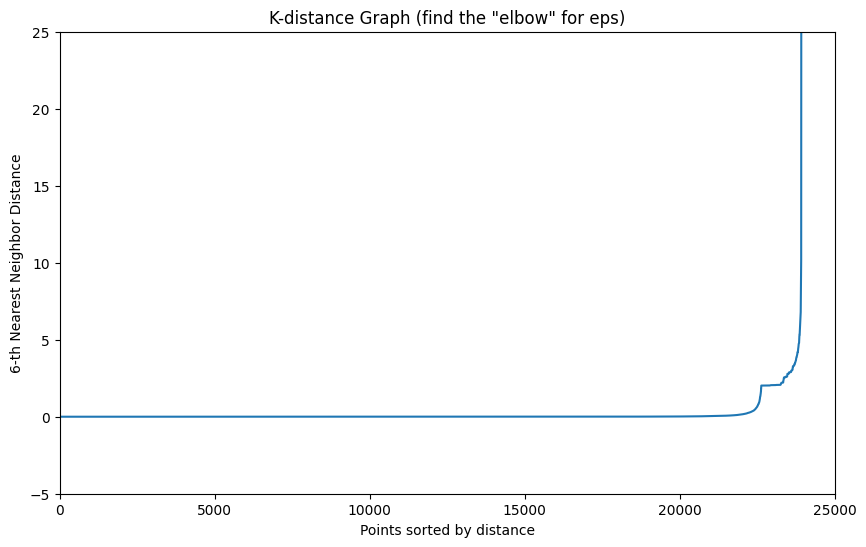

In [ ]:
min_samples = 6
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort distances for plotting
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph (find the "elbow" for eps)')
plt.xlim(-5, 25000)
plt.ylim(-5, 25)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=7, min_samples=6)
dbscan_labels = dbscan.fit_predict(scaled_data)
data_DBSCAN['DBSCAN_Cluster'] = dbscan_labels

In [ ]:
for cluster_id in set(dbscan_labels):
    if cluster_id != -1:
        print(f"Games in DBSCAN cluster {cluster_id}:\n")
        cluster_games = data_DBSCAN[data_DBSCAN['DBSCAN_Cluster'] == cluster_id][['name']]
        print(cluster_games.head())

Games in DBSCAN cluster 0:

                        name
0             Counter-Strike
1      Team Fortress Classic
2              Day of Defeat
3         Deathmatch Classic
4  Half-Life: Opposing Force
Games in DBSCAN cluster 1:

                    name
189             X-Blades
190     Two Worlds II HD
685             The Void
1209             Demigod
2487  Hero and Daughter+
Games in DBSCAN cluster 2:

                                        name
471      Penumbra: Black Plague Gold Edition
1900  Deadly Premonition: The Director's Cut
2535                                Darkwood
5431          Redemption: Saints And Sinners
5953                                  Mortos
Games in DBSCAN cluster 3:

                    name
473    Penumbra Overture
1430  Zombie Playground™
1468              Lucius
1501    Zombie Driver HD
1804          Inquisitor
Games in DBSCAN cluster 4:

                   name
1905  Knytt Underground
2215  Vanguard Princess
3352   Agents of Mayhem
6261    Caladrius Bl

In [ ]:
noise_games = data_DBSCAN[data_DBSCAN['DBSCAN_Cluster'] == -1]
if len(noise_games) > 0:
    print(f"\nNoise points (outliers, DBSCAN label = -1):")
    print(noise_games[['name',]])


Noise points (outliers, DBSCAN label = -1):
                                   name
19                      Team Fortress 2
22                               Dota 2
25     Counter-Strike: Global Offensive
121                         Garry's Mod
1467                           PAYDAY 2
1506                               DayZ
2016                               Rust
2031                     Rocket League®
2478                 Grand Theft Auto V
4712              ARK: Survival Evolved
7809                   Z1 Battle Royale
12836     PLAYERUNKNOWN'S BATTLEGROUNDS
15905                      Dragon Glory
16940      SCHOOL SIMULATOR MULTIPLAYER


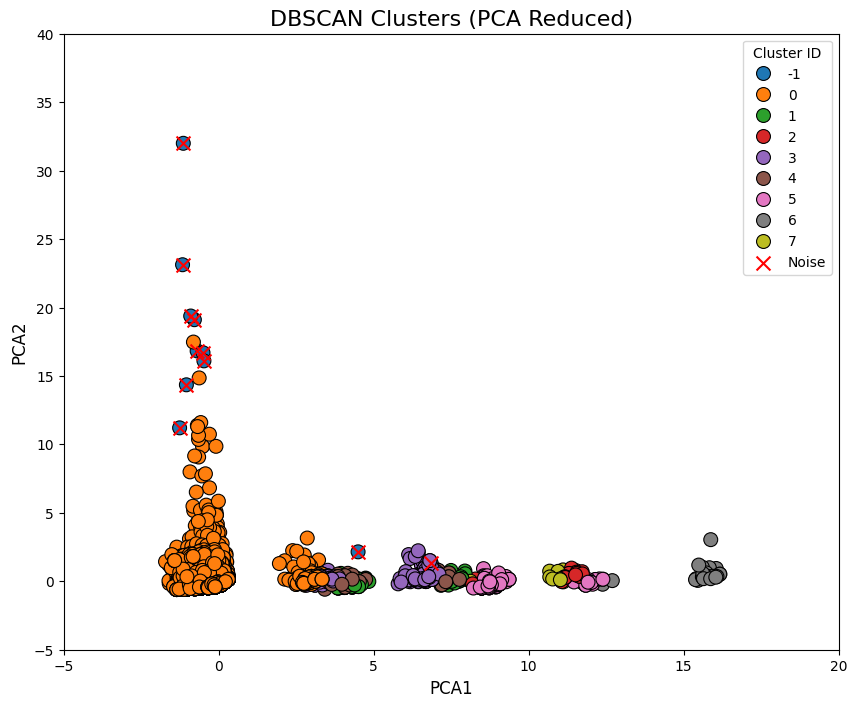

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


data_plot = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
data_plot['Cluster'] = dbscan_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_plot, palette='tab10', marker='o', s=100, edgecolor='black')

# Highlighting noise points (DBSCAN label -1)
plt.scatter(data_plot[data_plot['Cluster'] == -1]['PCA1'],
            data_plot[data_plot['Cluster'] == -1]['PCA2'],
            color='red', label='Noise', s=100, marker='x')

plt.title('DBSCAN Clusters (PCA Reduced)', fontsize=16)
plt.xlim(-5, 20)
plt.ylim(-5, 40)

plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title="Cluster ID", loc='upper right')
plt.show()